### Convolutional Neural Networks for Computer Vision

Convolutional neural networks (CNNs) is a different class of neural network.

CNNs have been hugely successful in the domain of computer vision, and as we learn more about them, we will be able to appreciate the reasons for this.

CNNs are a specialized kind of network that can take in images as tensors.

A colored image consists of three color channels, red, green, and blue, referred to as RGB.

These 2D-matrix channels are stacked to form colored images as we know them;

the variations in the values of each channel give rise to different colors.

A CNN takes in images as three separate stacked strata of color, one on top of the other.

An image gets its meaning from a set pixel in the neighborhood, but a single pixel doesn't hold much information about the entire image.

In a fully connected neural network, which is also called a dense layer, every node from one layer is connected to every other node in the subsequent layer.

A CNN leverages the spatial structure between the pixels to reduce the number of connections between two layers, significantly improving the speed of training while at the same time reducing the model parameters.

A CNN picks up features from an input image using a filter;

a CNN with a sufficient number of filters detects various features in the image.

These filters become more and more sophisticated in detecting complex features as we move more and more toward the later layers.

Convolutional networks use these filters and map them one by one to create a map of feature occurrences.

### Exploring convolutions

Convolutions are a component within CNNs.

They are defined as a layer within the CNNs.

In a convolution layer, we slide a filter matrix over the entire image matrix from left to right and from top to bottom, and we take the dot product of the filter, with this patch spanning the size of the filter over the image channel.

If the two matrices have high values in the same positions, the dot product's output will be high, and vice versa.

The output of the dot product is a scalar value that identifies the correlation between the pixel pattern in the image and the pixel pattern expressed by the filter.

Different filters detect different features from the image and at various levels of complexity.

We need to understand two more key elements of CNNs, which are as follows:

**Stride:** This is the number of pixels that we shift both horizontally and vertically before applying convolution networks using a filter on the next patch of the image.

**Padding:** This is the strategy that we apply to the edges of an image while we convolve, depending on whether we want to keep the dimensions of the tensors the same after convolution or only apply convolution where the filter fits properly with the input image.
If we want to keep the dimensions the same, then we need to zero pad the edge so that the original dimensions match with the output after convolution.

This is called **same padding.**

But if we don't want to preserve the original dimensions, then the places where the filter doesn't fit completely are truncated, which is called **valid padding.**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# we will apply 2D convolution to an image

nn.Conv2d(3, 16, 3, padding=1) #Creates a 2D convolution layer that takes 3 input channels, outputs 16 feature maps, uses 3×3 filters, and applies padding of 1

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
# We then add striding and padding of the desired size to the edge of an image
#Defines a 2D convolution layer with 3 input channels and 16 output feature maps using 3×3 kernels, a stride of 2 for downsampling, and asymmetric padding (1 row, 2 columns)
nn.Conv2d(3, 16, 3, stride=2, padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 2))

In [ ]:
# We can then create a non square kernel (filter)
#Creates a 2D convolution layer with 3 input channels and 16 output channels using rectangular kernels of size 3×4, and applies symmetric padding of 1
nn.Conv2d(3, 16, (3,4), padding=1)

Conv2d(3, 16, kernel_size=(3, 4), stride=(1, 1), padding=(1, 1))

In [ ]:
#2D conv: 3 in, 16 out, 3×4 kernel, padding 1.
nn.Conv2d(3, 16, (3,4), padding=(1,4))

Conv2d(3, 16, kernel_size=(3, 4), stride=(1, 1), padding=(1, 4))

In [ ]:
nn.Conv2d(3, 16, (3,4), stride=(3,3), padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 4), stride=(3, 3), padding=(1, 2))

In [ ]:
nn.Conv2d(3, 16, (3,4), stride=3, padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 4), stride=(3, 3), padding=(1, 2))

In [ ]:
nn.Conv2d(3, 16, 3)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
nn.Conv2d(3, 16, 3, stride=2)

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))

We looked at multiple ways of creating a 2D convolution, wherein the first parameter is the number of channels in a given input image, which will be 3 for a color image and 1 for a grayscale image.

The second parameter is the number of output channels—in other words, the number of filters that we want from the given layer.

The third parameter is the kernel size—which is the size of the kernel—or the patch size of the image to be convoluted with a filter.

We then created a Conv2d object and passed the input to the 2D convolutional layer to get the output.

With nn.Conv2d(3, 16, 3), we created a convolutional layer, which takes in an input of 3 channels and outputs 16 channels.

This layer has a square kernel of size 3 x 3 with a default stride of 1 in its height and width.

We can add padding using the padding parameter, which can have an integer or a tuple value. Here, the integer value will create equal paddings for height and width, and a tuple value will have different paddings for height and width—this is true for the kernel size as well as the stride.

### Exploring pooling

Now we move on to the next crucial layer of CNNs—the pooling layer.

So far, we have been dealing with images without changing the spatial dimensions of the frames (considering the same padding); instead, we have been increasing the number of channels/filters.

The pooling layer is used to reduce the spatial dimension of an input, preserving its depth.

As we move from the initial layer to the later layers in a CNN, we want to identify more conceptual meaning in the image compared to actual pixel by pixel information, and so we want to identify and keep key pieces of information from the input and throw away the rest.

A pooling layer helps us do that.

### Here are the main reasons to use a pooling layer:

**Reduction in the number of computations:** We get better computational performance by reducing the spatial dimensions of the input without losing out on the filters, and so we reduce the time needed to train, as well as the computational resources.

Prevent overfitting: With reduced spatial dimensions, we reduce the number of parameters the model has, which in turn reduces the model complexity and helps us generalize better.

**Positional invariance:** This allows the CNN to capture the features within an image, irrespective of where the feature is located in a given image. Say that we are trying to build a classifier to detect mangoes.

It doesn't matter whether the mango is in the center, top-left, bottom-right, or wherever in the image—it needs to be detected.

The pooling layer helps us with this.


**There are many types of pooling, such as max pooling, average pooling, sum pooling, and so on;**

however, max pooling is the most popular.

In the same way that we dealt with a convolutional layer, we will define a window and apply the desired pooling operation in that window.

We will slide the window horizontally and vertically, as defined by the stride of the layer.

In [ ]:
max_pool = nn.MaxPool2d(3, stride=1) #Max pooling with 3×3 window and stride 1.

In [ ]:
a = torch.FloatTensor(3,5,5).random_(0, 10) #Creates a 3×5×5 float tensor with random integers 0–9.

In [ ]:
a

tensor([[[8., 0., 9., 1., 2.],
         [1., 6., 3., 2., 4.],
         [4., 7., 6., 9., 5.],
         [8., 4., 6., 5., 3.],
         [7., 1., 7., 4., 2.]],

        [[7., 7., 8., 0., 6.],
         [6., 2., 2., 7., 0.],
         [8., 0., 8., 1., 8.],
         [5., 9., 2., 0., 1.],
         [1., 2., 2., 6., 5.]],

        [[8., 7., 6., 9., 8.],
         [3., 2., 6., 7., 2.],
         [8., 9., 4., 2., 2.],
         [7., 0., 9., 8., 2.],
         [2., 9., 6., 8., 0.]]])

In [ ]:
max_pool(a)

tensor([[[9., 9., 9.],
         [8., 9., 9.],
         [8., 9., 9.]],

        [[8., 8., 8.],
         [9., 9., 8.],
         [9., 9., 8.]],

        [[9., 9., 9.],
         [9., 9., 9.],
         [9., 9., 9.]]])

In [ ]:
avg_pool = nn.AvgPool2d(3, stride=1) #Average pooling with 3×3 window and stride 1.
avg_pool(a)

tensor([[[4.8889, 4.7778, 4.5556],
         [5.0000, 5.3333, 4.7778],
         [5.5556, 5.4444, 5.2222]],

        [[5.3333, 3.8889, 4.4444],
         [4.6667, 3.4444, 3.2222],
         [4.1111, 3.3333, 3.6667]],

        [[5.8889, 5.7778, 5.1111],
         [5.3333, 5.2222, 4.6667],
         [6.0000, 6.1111, 4.5556]]])

We worked through an example of a tensor to see a pooling layer in action.

We used a square kernel of size 3 x 3.

The first application of pooling happened on the patch [0,0,0] to [0,3,3].

Since the stride is 1, the next patch to be operated on was [0,0,1] to [0,3,4].

Once it met the horizontal end, the tensor right below was operated on.

Both nn.MaxPool2d(3, stride=1) and nn.AvgPool2d(3, stride=1) created a max and average pool square kernel of size 3x3 with a stride of 1, which was applied on a random tensor, a.

### Exploring transforms

PyTorch cannot process an image pixel directly and needs to have the contents as tensors.

To get around this, torchvision, being a specialized library for vision and image-related tasks, provides a module called transform, which provides APIs for converting pixels into tensors, normalizing standard scaling, and so on. I

Let us explore various methods in the transform module.

torchvision must be installed

In [ ]:
from torchvision import datasets

In [ ]:
from torchvision import transforms

In [ ]:
transforms.Resize(1) #Resizes the input image so that its shorter side is scaled to 1 pixel while maintaining the aspect ratio

Resize(size=1, interpolation=bilinear, max_size=None, antialias=True)

In [ ]:
transforms.Resize((1,1)) #Resizes the input image to exactly 1×1 pixels, forcing both height and width to 1 regardless of aspect ratio.

Resize(size=(1, 1), interpolation=bilinear, max_size=None, antialias=True)

In [ ]:
transforms.Pad(1, 0) #Pads the image with a 1-pixel border on all sides using the value 0 (black).

Pad(padding=1, fill=0, padding_mode=constant)

In [ ]:
transforms.Pad((1, 2), 1) #Pads the image with 1 pixel on left/right and 2 pixels on top/bottom using the value 1 (white or intensity 1).

Pad(padding=(1, 2), fill=1, padding_mode=constant)

In [ ]:
transforms.Pad((1, 2, 2, 3), padding_mode='reflect') #Pads the image with 1 pixel left, 2 top, 2 right, and 3 bottom using reflected pixel values instead of a constant color.

In [ ]:
transforms.Normalize((0.5,),(0.5,)) #Normalizes each channel by subtracting mean 0.5 and dividing by std 0.5, scaling values to roughly [-1, 1].

Normalize(mean=(0.5,), std=(0.5,))

In [ ]:
# we chain multiple transforms
#Applies a center crop of size 10×10 to the image, then converts it to a PyTorch tensor.
transforms.Compose([
     transforms.CenterCrop(10),
     transforms.ToTensor(),
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

In the preceding code snippets, we looked at the various transforms that are available in torchvision.

These allow us to take input images and format them into tensors of the desired dimensions and properties, which can then be fed into torch models.

The first method that we looked at was the toTensor() method, which transforms a given input image into a tensor.

We could then normalize this input image tensor using the Normalize() method.

The Normalize() method takes in two tuples, where the first tuple is the sequence of the means of each channel in the input image and the second tuple is the sequence of the standard deviation for each channel.

Furthermore, we could resize a given image into the desired dimensions using the Resize() method, which, if given an integer, would match it with the length of the smaller edge, and if given a tuple, would match the height and width of the image.

There would be certain cases where the crucial information regarding the image is in its center, and in such cases, it would be okay to crop and consider only the center of the given image; for this, you could use the CenterCrop() method.

Then, we passed in an integer to crop a square from the center or to pass a sequence matching the height and width to CenterCrop().

Another important task is to pad the image to match certain dimensions.

For this, we use the Pad() method. We pass in the padding size as the integer for equal-sized padding on all sides or a sequence consisting of two elements for the padding size corresponding to the left/right and top/bottom, respectively.

Furthermore, we could pass in the padding size for the left, top, right, and bottom sides as a sequence consisting of four elements.

We then provided a fill value as an integer, and if it's a tuple of three elements, it's used as pad values for the R, G, and B channels, respectively.

Apart from these, the Pad() method also has a padding_mode parameter, which takes in the following possibilities:

constant: Pads with a fill value provided

edge: Pads with the value at the edge of the image

reflect: Pads with a reflection of the image, excluding the edge pixel

symmetric: Pads with a reflection of the image, including the edge pixel

In the end, we looked at the Compose() transform, which combined the various transforms to build a transformation pipeline by passing in a list of transform objects as a parameter.

In [ ]:
transforms.CenterCrop(10) #Crops the central 10×10 region of the image.

CenterCrop(size=(10, 10))

### Performing data augmentation

We will learn about data augmentation with torch.

Data augmentation is an important technique in deep learning and computer vision.

For any model dealing with deep learning or computer vision, the amount of data available is crucial to see how well the model performs.

Data augmentation prevents models from memorizing the limited amount of data rather than making generalizations about the observed data.

Data augmentation increases the diversity of data for training the model by creating variations from the original images without actually collecting new data.

Oftentimes, the amount of light, brightness, orientation, or color variations doesn't make a difference to the inferences that are made by a model; however, when the model is deployed in the real world, the input data may have these variations.

It is useful for the model to know that the decision it makes has to be invariant with respect to these variations in the input, and so data augmentation improves model performance.

In [ ]:
transforms.RandomCrop(10) #Randomly crops a 10×10 region from the image.

RandomCrop(size=(10, 10), padding=None)

In [ ]:
transforms.RandomCrop((10, 20)) #Randomly crops a region of size 10×20 (height×width) from the image.

RandomCrop(size=(10, 20), padding=None)

In [ ]:
transforms.RandomHorizontalFlip(p=0.3) #Randomly flips the image horizontally with a 30% probability.

RandomHorizontalFlip(p=0.3)

In [ ]:
transforms.RandomVerticalFlip(p=0.3) #Randomly flips the image vertically with a 30% probability.

RandomVerticalFlip(p=0.3)

In [ ]:
transforms.ColorJitter(0.25, 0.25, 0.25, 0.25) #Randomly changes brightness, contrast, saturation, and hue by up to ±25%.

ColorJitter(brightness=(0.75, 1.25), contrast=(0.75, 1.25), saturation=(0.75, 1.25), hue=(-0.25, 0.25))

In [ ]:
transforms.RandomRotation(10) #Randomly rotates the image by up to ±10 degrees.

RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)

In [ ]:
 #Applies a random rotation up to ±10° to the image, then converts it to a PyTorch tensor.
transforms.Compose([
     transforms.RandomRotation(10),
     transforms.ToTensor(),
])

Compose(
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
)

In [ ]:
#Applies random horizontal flip, random rotation up to ±20°, converts to tensor, then normalizes each channel with mean 0.5 and std 0.5.
transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

We saw how we could add variations to our data by performing certain transformations that are meaningful for the problem at hand.

We have to be careful when picking the right data augmentation that mimics the kind of image variations that we would get in real life.

For instance, when building a car classifier, it would make sense to augment data with variations in colors and brightness, or flipping the car image horizontally, and so on; however, it would not make sense for us to augment data with car images that are flipped vertically, unless we are dealing with a problem where a car is turned upside down.

We tried cropping the image in a random place so that if the entire image of an object isn't available but a portion is, then our model would be able to detect the object.

We should include the cropped image size as an integer or a tuple of a particular height and width.

Then, we flipped our image horizontally and passed in a probability for the random horizontal flip and vertical flip.

We then created variations in the color, contrast, saturation, and hue of the image using the ColorJitter() method.

We controlled the amount of variation in each of them by setting the parameter, where the color, contrast, and saturation vary between the [max(0, 1 - parameter), 1 + parameter] values and the hue varies between [-hue, hue], where the hue is between 0 and 0.5.

We also added a random rotation to the images and provided the maximum angle of rotation.

Finally, after we picked the right data augmentation strategy, we added it to transforms.compose().


**We will use the CIFAR-10 dataset, which consists of 60,000 32 x 32 pixel colored images for each of the 10 classes in the dataset.**

**These classes are Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, and Truck.**

In [ ]:
train_data = datasets.CIFAR10('CIFAR10', train=True, download=True, transform=transformations)

100%|██████████| 170M/170M [00:02<00:00, 76.8MB/s]


In [ ]:
test_data = datasets.CIFAR10('CIFAR10', train=False, download=True, transform=transformations)

In [ ]:
len(train_data), len(test_data)

(50000, 10000)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
validation_size = 0.2

In [ ]:
import numpy as np

In [ ]:
training_size = len(train_data)

In [ ]:
indices = list(range(training_size))

In [ ]:
np.random.shuffle(indices)

In [ ]:
index_split = int(np.floor(training_size * validation_size))

In [ ]:
validation_indices, training_indices = indices[:index_split], indices[index_split:]

In [ ]:
training_sample = SubsetRandomSampler(training_indices)
validation_sample = SubsetRandomSampler(validation_indices)

In [ ]:
batch_size = 16

In [ ]:
from torch.utils.data.dataloader import DataLoader

In [ ]:
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=training_sample)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=validation_sample)
test_loader = DataLoader(train_data, batch_size=batch_size)

In the above code we used the datasets module in PyTorch to get the CIFAR10 dataset.

We then defined the transformations that would make sense for the images in the dataset, which are images of animals corresponding to 10 different classes.

We performed a horizontal flip for some of the images at random and also added rotation to some of the images at random, with a range of -20 to 20 degrees.

However, we didn't add a vertical flip, since we don't anticipate having an upside-down image of animals to feed into the model in the evaluation phase.

After that, we converted the images into tensors using the ToTensor() transform.

Once the tensors were prepared, we used the Normalize() transform to set the mean and standard deviation for each of the red, green, and blue channels, respectively.

Following this, we used the CIFAR10() method in the datasets to use the CIFAR10 dataset.

Then, we set the download parameter to True so that if the dataset is not present in the root directory, CIFAR10 (the first argument), then it will be downloaded and kept in that directory.

For the training data, we set the train parameter to True and passed the transformations that were to be applied to the data using the transform parameter.

This allowed us to create images on the fly without explicitly creating new images.

Now, to prepare the test data, we set the train argument to False. We set the size of the training and test dataset to be 50,000 and 10,000, respectively.

Then, we prepared the validation set from the training set using 20% of the training set, as defined by validation_size.

We randomly picked 20% of the training set to create a validation set so that the validation set is not skewed to a certain class of animal.

We then took the size of the training set and prepared a list of indices using range() in Python.

We then shuffled a list of indices using the random.shuffle() method in numpy.

Once the list of indices was randomized, we moved the first 20% of the indices to the validation set and the remaining 80% of the indices to the training set.

We found the split index by multiplying the original training size with the percentage of the original training set to be used as a validation set.

We used split_index for the split.

We then used the SubsetRandomSampler() method in torch.utils.data to sample the elements randomly from a given list of indices, without replacement.

Finally, we used DataLoader() to combine a dataset and sampler to provide an iterable over the dataset.

We then used the dataloader for the training, validation, and test sets to iterate over the data while training the model.

### Defining the CNN architecture

Now we will define the CNN model architecture from the components that we have seen so far to complete the model.

This is very similar to the fully connected neural network.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CNN(nn.Module):  # Defines a custom CNN class inheriting from PyTorch's nn.Module.
    def __init__(self): # Initializes the network layers.
        super().__init__()# Calls the parent class constructor.
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 1st conv: 3 input channels → 16 feature maps, 3x3 kernel, same padding.
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 2nd conv: 16 input → 32 output channels, 3x3 kernel, same padding.
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 3rd conv: 32 input → 64 output channels, 3x3 kernel, same padding.
        self.pool = nn.MaxPool2d(2, 2) # Max pooling layer with 2x2 window and stride 2 to downsample.
        self.linear1 = nn.Linear(64 * 4 * 4, 512) # Fully connected layer: flattens features to 512 units.
        self.linear2 = nn.Linear(512, 10) # Output layer: 512 units → 10 classes
        self.dropout = nn.Dropout(p=0.3)  # Dropout layer with 30% probability to reduce overfitting.

    def forward(self, x): # Defines the forward pass.
        x = self.pool(F.relu(self.conv1(x))) # Conv1 → ReLU → MaxPool.
        x = self.pool(F.relu(self.conv2(x))) # Conv2 → ReLU → MaxPool.
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 → ReLU → MaxPool.
        x = x.view(-1, 64 * 4 * 4) # Flattens tensor to (batch_size, 1024).
        x = self.dropout(x) # Applies dropout.
        x = F.relu(self.linear1(x))  # Fully connected layer with ReLU activation.
        x = self.dropout(x) # Applies dropout again.
        x = self.linear2(x)  # Final output layer (logits for 10 classes).
        return x   # Returns network output.

In [ ]:
model = CNN()

In [ ]:
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

We defined a CNN class that is inherited from nn.Module in PyTorch by starting with the __init__() method and the constructor of the parent class.

After that, we defined the various layers in our CNN by passing in the parameters relevant to each layer.

For our first convolutional layer, the number of input channels was 3 (RGB), and the number of output channels was defined as 16 and had a square kernel size of 3.

The second convolutional layer took in the tensors from the previous layer and had 16 input channels and 32 output channels with a kernel size of 3 x 3.

Similarly, the third convolutional layer had 32 input channels and 64 output channels with a 3 x 3 kernel. We also needed a max pooling layer and used a kernel size of 2 and a stride of 2.

We used .view() to flatten the three dimensions of the tensor into one dimension so that it could be passed into a fully connected network.

The -1 in the view function ensured that the right size was automatically assigned to that dimension by making sure that the number of elements before and after the view function remained the same, which in this case was the batch size.

For the first fully connected layer, we had 1,024 inputs (obtained from flattening the 64 x 4 x 4 tensor after the max pool) and 512 outputs.

For the last fully connected layer, we had 512 inputs and 10 outputs, representing the number of output classes.

We also defined a dropout layer for our fully connected layer with a probability of 0.3.

Next, we defined the forward() method, where we wired together the components defined in the __init__() method.

So, an input batch of 16 tensors, each with the dimensions of 32 x 32 x 3, went through the first convolutional layer, followed by a ReLU and then a max pooling layer, to form an output tensor with the dimensions of 16 x 16 x 16, and then through the second convolutional layer, followed by a ReLU and a max pool layer, with an output with the dimensions of 8 x 8 x 32, and then through the third convolutional layer, followed by a ReLU and a max pool layer, with the dimensions of 4 x 4 x 64.

After this, we flattened the image out to a vector of 1,024 elements and passed it through the dropout layer into the first fully connected layer, giving us 512 outputs, followed by a ReLU and a dropout, into the final fully connected layer to give us the desired number of outputs, which is 10 in our case.

We then instantiated the model from the CNN class and printed the model.

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device.type

'cpu'

In [ ]:
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
n_epochs = 10

In [ ]:
def accuracy(preds, y):
    _, pred = torch.argmax(preds, 1)
    correct = pred.eq(target.data.view_as(pred))
    acc = correct.sum()/len(correct)
    return acc

In [ ]:
for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)

    print(f'| Epoch: {epoch:02} | Train Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f} |')

| Epoch: 01 | Train Loss: 2.097 | Val. Loss: 1.836 |
| Epoch: 02 | Train Loss: 1.687 | Val. Loss: 1.529 |
| Epoch: 03 | Train Loss: 1.509 | Val. Loss: 1.418 |
| Epoch: 04 | Train Loss: 1.413 | Val. Loss: 1.308 |
| Epoch: 05 | Train Loss: 1.332 | Val. Loss: 1.246 |
| Epoch: 06 | Train Loss: 1.265 | Val. Loss: 1.203 |
| Epoch: 07 | Train Loss: 1.211 | Val. Loss: 1.149 |
| Epoch: 08 | Train Loss: 1.162 | Val. Loss: 1.103 |
| Epoch: 09 | Train Loss: 1.127 | Val. Loss: 1.052 |
| Epoch: 10 | Train Loss: 1.092 | Val. Loss: 1.022 |


In [ ]:
torch.save(model.state_dict(), "cifar10.pth")

For this, we made our imports and started by identifying and assigning our model to the appropriate device that we have on our machine.

We used the model.to(device) method to move our model, which is more elegant than using model.cuda() or model.cpu().

We then defined our loss function, also called criterion.

Since this is a classification problem, we used cross-entropy loss.

Then, we chose the SGD optimizer to update our model weights on backpropagation, with a learning rate of 0.01, and passed in the model parameters using model.parameters().

We then ran our model for 30 epochs, though we could have chosen any reasonable number to do this.

In the loop, we reset the training and validation losses to 0 and set the model in train mode, and then we iterated over each batch in the training dataset.

We moved the batch first to the device so that, if we had limited GPU memory, not all the data would not be loaded fully into GPU memory.

Then, we passed the input tensor into the model and fetched the output and passed it into the loss function to evaluate the difference in the labels that were predicted and the true labels.

After this, we performed backpropagation using loss.backward() and updated the model weights using the optimizer.step() steps. We then aggregated the loss in the batch using total epoch loss. We then switched the model into the evaluations model using model.eval(), since the model's performance needed to be evaluated on the validation set and the model doesn't learn during this phase, and we needed to shut down the dropouts as well.

Iterating over the validation batches, we got the model output and accumulated the losses across the validation batches in the entire epoch.

After this, we formatted the model performance to see the model changes in each epoch.

We noticed that the model training and validation losses decrease over the epochs, which is an indicator that the model is learning.

### Random flip

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.52MB/s]


Original image (PIL) is a 'Ankle boot' (Label: 9)


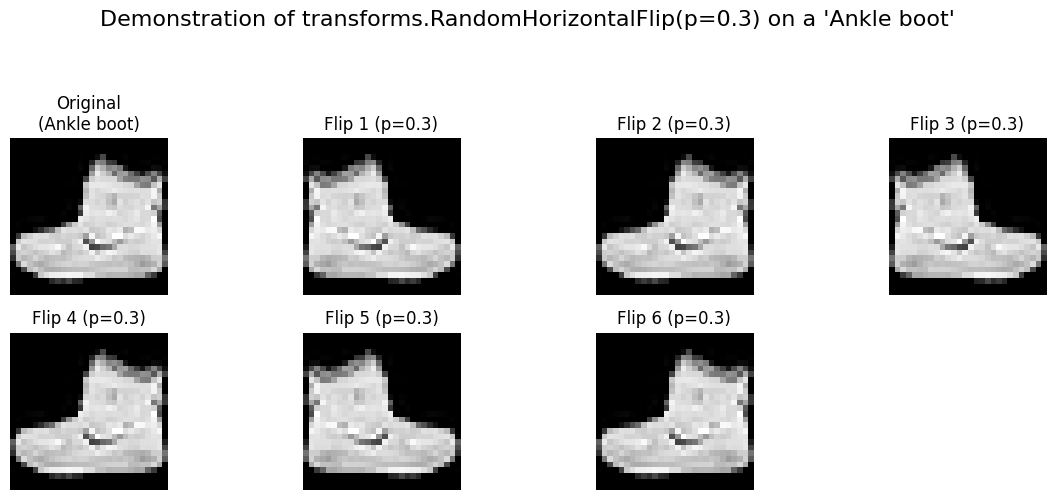


Explanation:
We took an original image (a 'Ankle boot').
We then applied `transforms.RandomHorizontalFlip(p=0.3)` 6 times.
This transform has a 30% chance (p=0.3) to horizontally flip the image each time it's applied.
You will observe that some of the displayed images are horizontally flipped, while others are identical to the original, demonstrating the random nature of the transform.


In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Load a sample image from the FashionMNIST dataset
# We'll load the dataset without any initial transform, so we get a PIL Image.
trainset_raw = datasets.FashionMNIST('Fashion_MNIST/', download=True, train=True, transform=None)

# Get the first image and its label from the dataset
example_pil_image, example_label = trainset_raw[0]
class_name = trainset_raw.classes[example_label]

print(f"Original image (PIL) is a '{class_name}' (Label: {example_label})")

# 2. Define the RandomHorizontalFlip transform
random_flip_transform = transforms.RandomHorizontalFlip(p=0.3)

# 3. Define a transform to convert PIL Image to PyTorch Tensor for display
# This also scales pixel values to [0.0, 1.0]
to_tensor_for_display = transforms.ToTensor()

# --- Displaying Original and Transformed Images ---

num_flips_to_show = 6 # Number of times to apply the flip and display the result

plt.figure(figsize=(12, 5)) # Adjust figure size for better display

# Display the original image
plt.subplot(2, (num_flips_to_show // 2) + 1, 1) # Dynamic subplot layout
plt.imshow(example_pil_image, cmap='gray')
plt.title(f"Original\n({class_name})")
plt.axis('off') # Hide axes ticks

# Apply the random flip transform multiple times and display
for i in range(num_flips_to_show):
    # Apply the random flip transform to the original PIL image
    flipped_pil_image = random_flip_transform(example_pil_image)

    # Convert the (possibly) flipped PIL image to a NumPy array for matplotlib
    # .squeeze() removes the channel dimension (1, H, W) -> (H, W) for grayscale
    flipped_image_np = to_tensor_for_display(flipped_pil_image).squeeze().numpy()

    # Create a subplot for each transformed image
    plt.subplot(2, (num_flips_to_show // 2) + 1, i + 2) # +2 because original is at index 1
    plt.imshow(flipped_image_np, cmap='gray')
    plt.title(f"Flip {i+1} (p=0.3)")
    plt.axis('off') # Hide axes ticks

plt.suptitle(f"Demonstration of transforms.RandomHorizontalFlip(p=0.3) on a '{class_name}'", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\nExplanation:")
print(f"We took an original image (a '{class_name}').")
print(f"We then applied `transforms.RandomHorizontalFlip(p=0.3)` {num_flips_to_show} times.")
print(f"This transform has a 30% chance (p=0.3) to horizontally flip the image each time it's applied.")
print("You will observe that some of the displayed images are horizontally flipped, while others are identical to the original, demonstrating the random nature of the transform.")